In [7]:
import re
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from sar_speckle.filters import lee_filter, kuan_filter, frost_filter
from sar_speckle.metrics import estimate_enl

In [8]:
# Cambia este nombre si generaste otro
img_path = Path("/Users/felixmaral/Documents/Code/Projects/SpeckleNoise-SAR-analisys/outputs/example/sim_gray0.7_L4.0.png")

# Cargar en [0,1]
I = np.asarray(Image.open(img_path).convert("L"), dtype=np.float32) / 255.0
H, W = I.shape
print("Loaded:", img_path, I.shape, I.min(), I.max())

# Intenta extraer L del nombre de archivo (sim_gray{x}_L{L}.png)
m = re.search(r"_L([0-9]+(?:\\.[0-9]+)?)", img_path.name)
L = float(m.group(1)) if m else 3.0
print("Assumed ENL (L):", L)

Loaded: /Users/felixmaral/Documents/Code/Projects/SpeckleNoise-SAR-analisys/outputs/example/sim_gray0.7_L4.0.png (256, 256) 0.02745098 1.0
Assumed ENL (L): 4.0


In [9]:
size = 7   # ventana (imágenes pequeñas: 5 o 7; grandes: 7-11)
I_lee  = lee_filter(I,  size=size, enl=L)
I_kuan = kuan_filter(I, size=size, enl=L)
I_frost = frost_filter(I, size=5,  enl=L, damping=1.0)

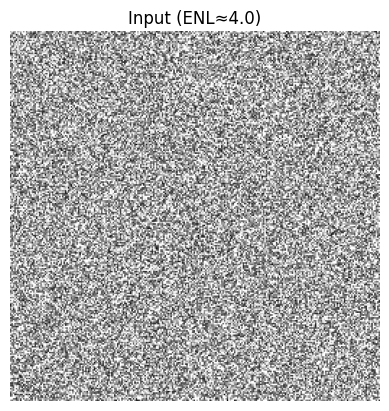

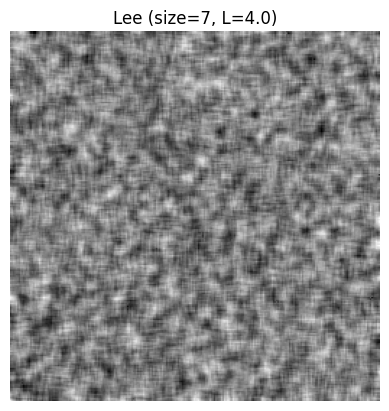

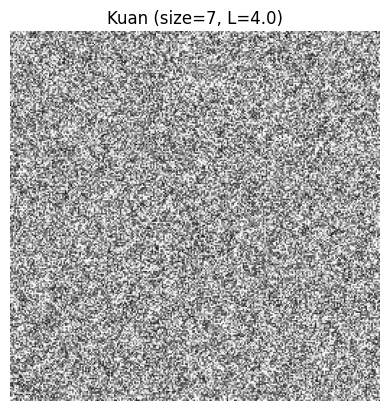

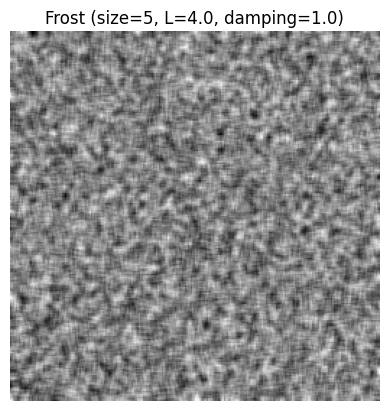

In [10]:
def show(img, title):
    plt.figure()
    plt.title(title)
    plt.imshow(np.clip(img, 0, 1), cmap="gray")
    plt.axis("off")
    plt.show()

show(I,       f"Input (ENL≈{L})")
show(I_lee,   f"Lee (size={size}, L={L})")
show(I_kuan,  f"Kuan (size={size}, L={L})")
show(I_frost, f"Frost (size=5, L={L}, damping=1.0)")